In [8]:
#importing required packages

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Questions :

### 1) Make a pair plot on Readmission Registry table & do u see any correlation between columns values

### 2) Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

### 3) Create a figure object called fig using plt.figure() ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** Plot (x,y) on that axes and set the labels.


### 4) Display data by splitting age in 4 quartiles and labeling the quartiles.

### 5) Display full name of patients who are born in 1986.

### 6) Create a jointplot on expected mortality & expected length of stay.

<Figure size 800x400 with 0 Axes>

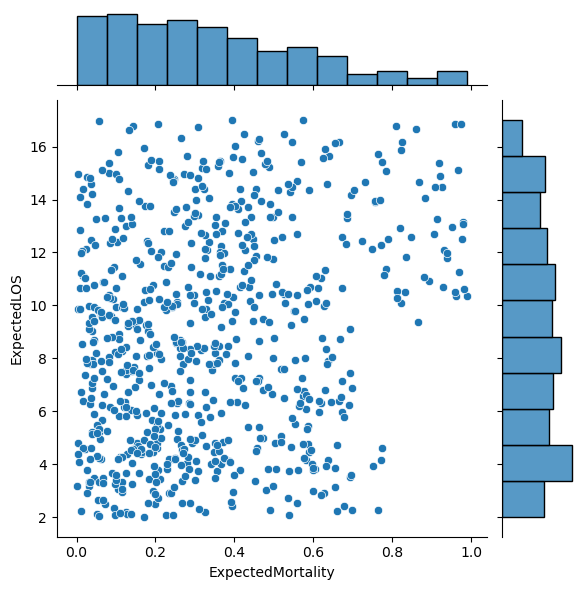

In [23]:
df = pd.read_excel("HospitalDatabase.xlsx","Discharges")

fig = plt.figure(figsize=(8,4))
sns.jointplot(data = df, x = 'ExpectedMortality' , y = 'ExpectedLOS')
plt.show()

### 7) Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

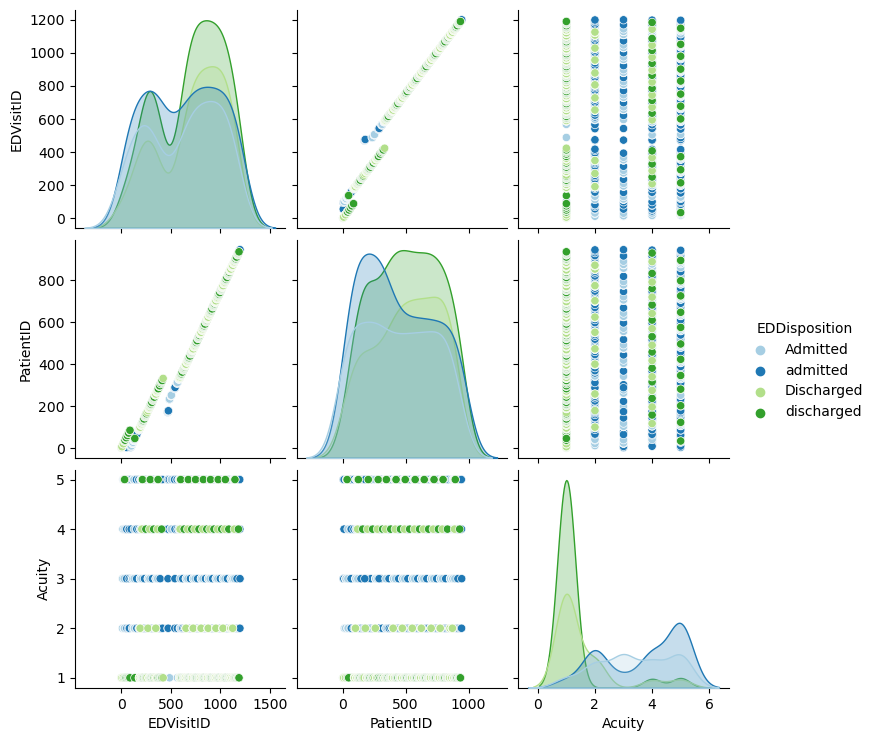

In [22]:
df = pd.read_excel("HospitalDatabase.xlsx","EDUnique")

sns.pairplot(df, hue = 'EDDisposition', palette = 'Paired')
plt.show()

### 8) Create a bar chart between expectedLOS & Primary diagnosis.

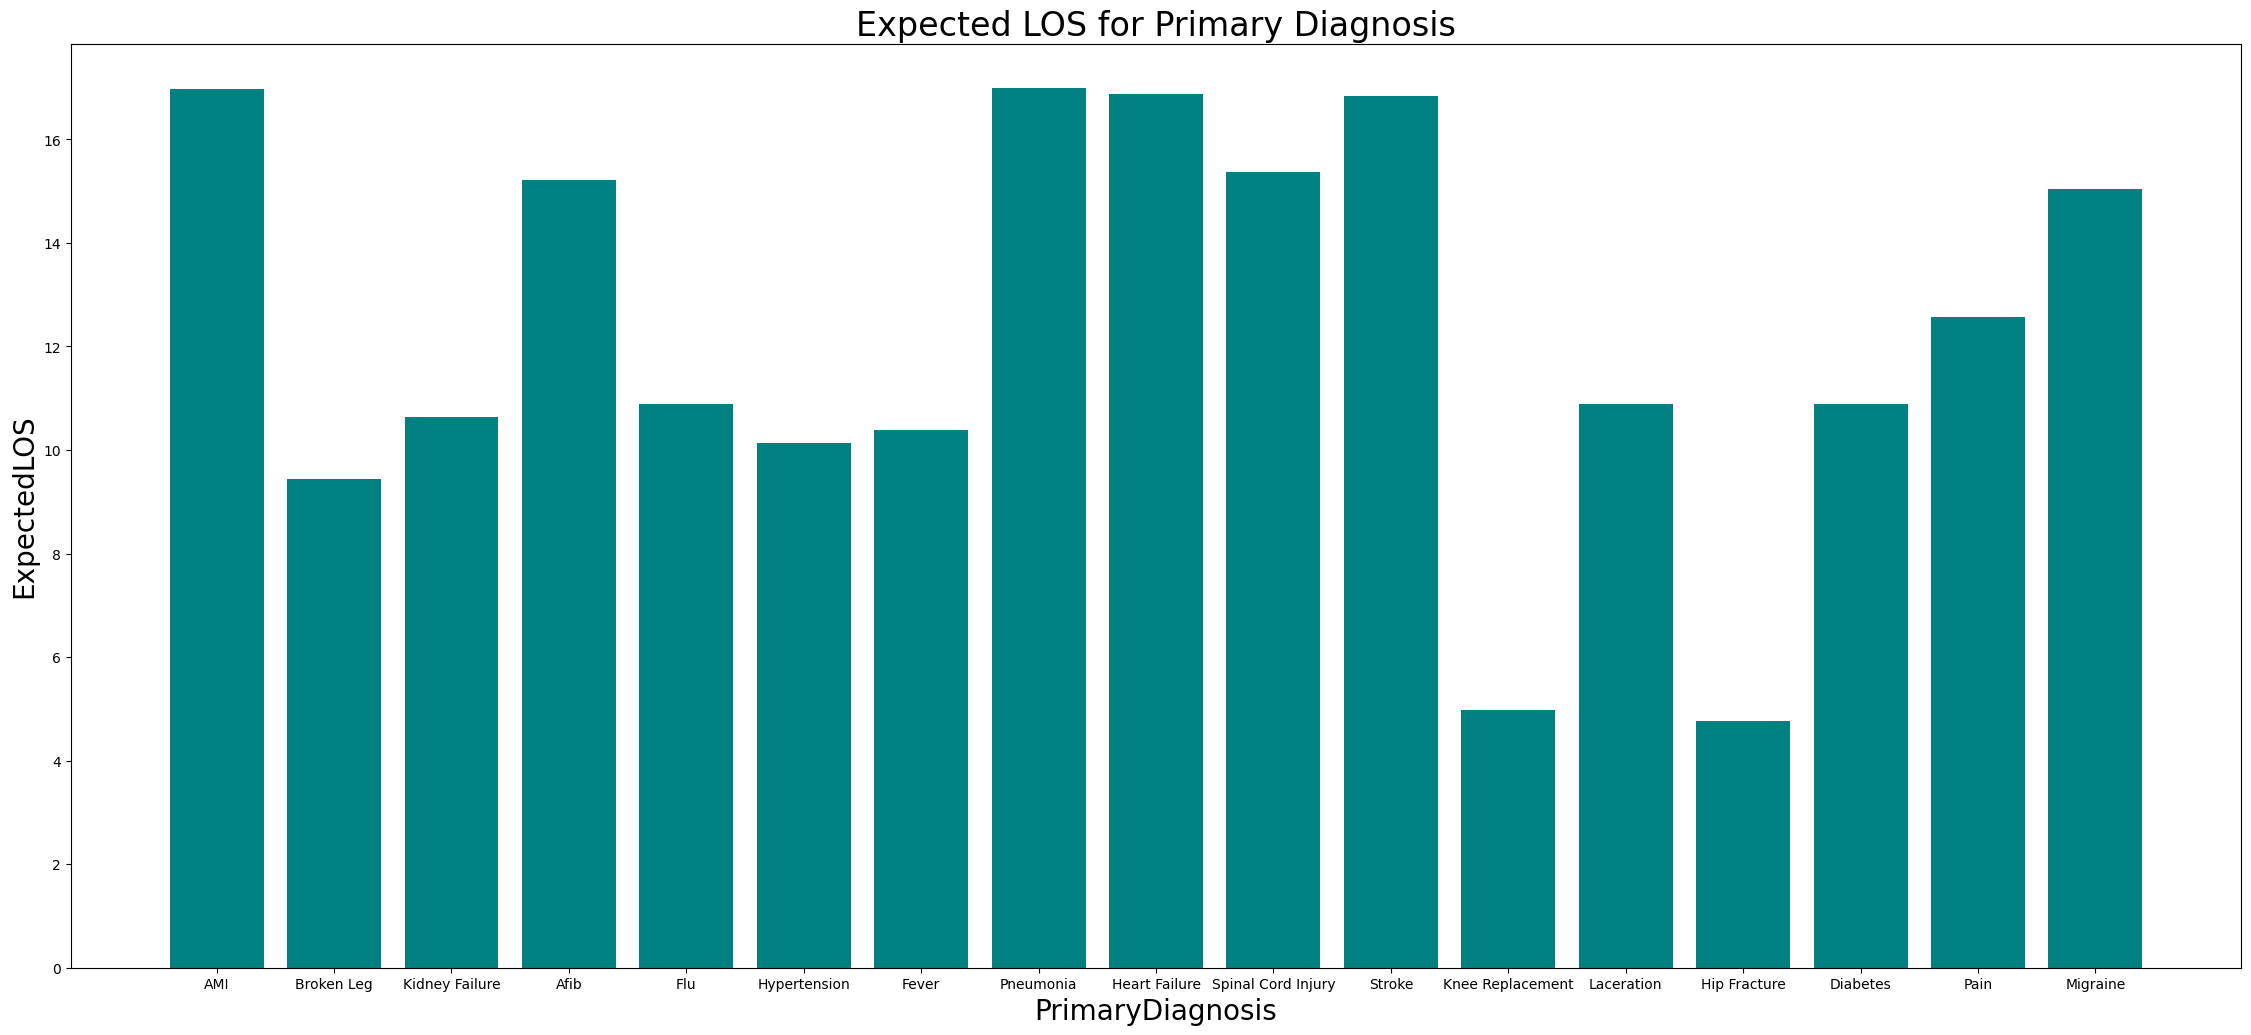

In [16]:
data = pd.read_excel("HospitalDatabase.xlsx","Discharges")

fig = plt.figure(figsize=(28,12))
plt.bar(data['PrimaryDiagnosis'], data['ExpectedLOS'], color = "teal")
plt.title('Expected LOS for Primary Diagnosis', fontsize=24)
plt.xlabel('PrimaryDiagnosis', fontsize=20)
plt.ylabel('ExpectedLOS', fontsize=20)
plt.show()

### 9) Get the list of patient ID's which are not there in ReadmissionRegistry.

In [21]:
df1 = pd.read_excel("HospitalDatabase.xlsx","Patients")
df2 = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

common = df1.merge(df2,on=['PatientID'])
result = df1[(~df1.PatientID.isin(common.PatientID))]

print("Patient IDs which are not there in ReAdmissionRegistry are :" )
print((result['PatientID']).to_string(index= False))

Patient IDs which are not there in ReAdmissionRegistry are :
  4
135
145
189
200
224
234
374
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
414
501
562
599
690
691
704
726
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939

### 10) Create a boxplot on ExpectedLOS by taking service into account.

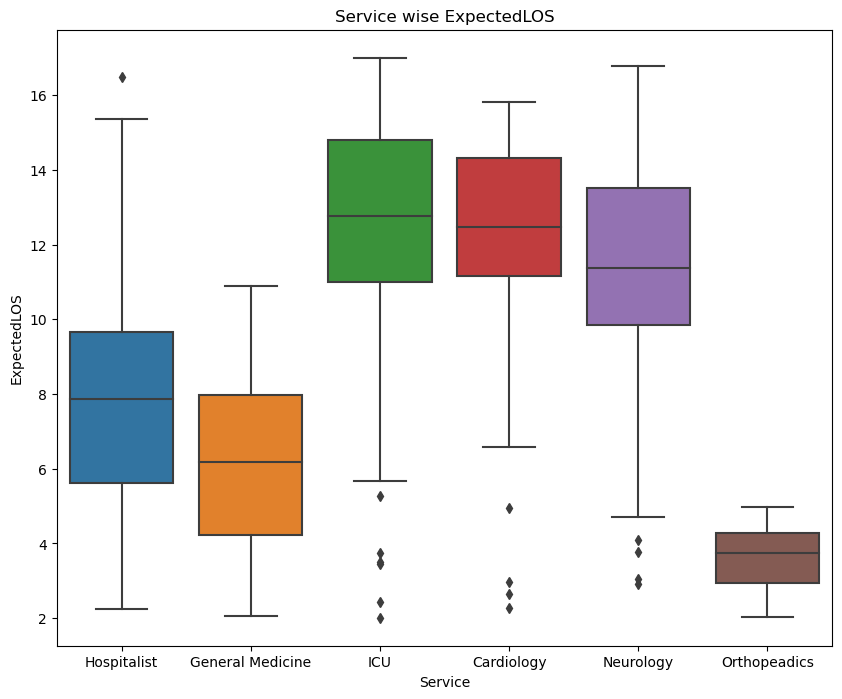

In [4]:
data = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

fig = plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='Service',y='ExpectedLOS')
plt.title('Service wise ExpectedLOS')
plt.show()

### 21) Which demographic patients are prone to get stroke?

### 22)Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [23]:
data = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df = data.groupby(['Acuity','EDDisposition']).size().reset_index(name='PatientCount')
df1= df.set_index(['Acuity','EDDisposition'])
df1

PatientCount
Acuity EDDisposition              
1      Admitted                 32
       Discharged              558
2      Admitted                116
       Discharged               66
3      Admitted                 81
4      Admitted                107
       Discharged               30
5      Admitted                179
       Discharged               30

### 23) Write a function to find the center element in the list. (one element in odd length list,  two elements in even length list).

In [22]:
EvenLengthList = [1,2,3,4,5,6,7,8,9,10,11,12]
OddLengthList  = [1,2,3,4,5,6,7,8,9]

def findMiddle(input_list):
    middle = float(len(input_list))/2
    if len(input_list) % 2 != 0 :
       return input_list[int(middle - .5)]
    else:
      return (input_list[int(middle-1)],input_list[int(middle)])

print("EvenLengthList : ",EvenLengthList )
print("Output : " , findMiddle(EvenLengthList) , "\n")
print("OddLengthList : ",OddLengthList)
print("Output : " ,findMiddle(OddLengthList))

EvenLengthList :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Output :  (6, 7) 

OddLengthList :  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Output :  5


### 24) Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

In [26]:
data = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df = data.groupby(['ReasonForVisit','EDDisposition'])['PatientID'].count().reset_index(name = 'PatientCount')
print("Using Stack : " + "\n", df.stack(0), "\n") 
print("Using UnStack : " + "\n", df.unstack(0))

Using Stack : 
 0   ReasonForVisit               Accident
    EDDisposition                Admitted
    PatientCount                       39
1   ReasonForVisit               Bleeding
    EDDisposition                Admitted
    PatientCount                       16
2   ReasonForVisit               Bleeding
    EDDisposition              Discharged
    PatientCount                       15
3   ReasonForVisit           Car Accident
    EDDisposition                Admitted
    PatientCount                       17
4   ReasonForVisit             Chest Pain
    EDDisposition                Admitted
    PatientCount                       94
5   ReasonForVisit             Chest Pain
    EDDisposition              Discharged
    PatientCount                       15
6   ReasonForVisit                  Cough
    EDDisposition              Discharged
    PatientCount                        1
7   ReasonForVisit                  Fever
    EDDisposition                Admitted
    PatientCount  

### 25) Plot a graph by counting the no. of patients in each department.

Text(0, 0.5, 'Number of Patients')

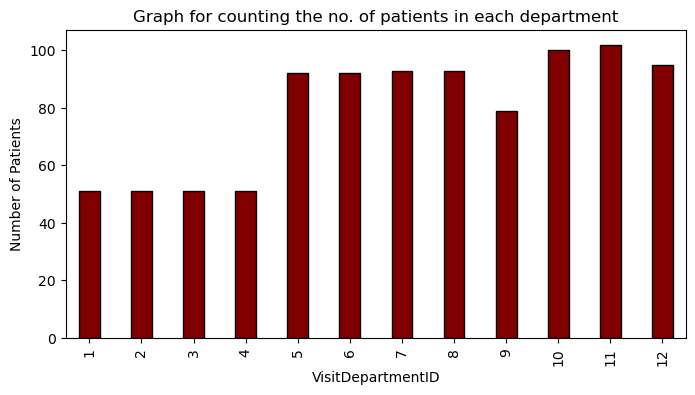

In [3]:
df = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")

fig = plt.figure(figsize=(8,4))
df.groupby('VisitDepartmentID')['PatientMRN'].size().plot(kind = "bar",  width = 0.4, color = "maroon", edgecolor = "black")
plt.title("Graph for counting the no. of patients in each department")
plt.ylabel("Number of Patients")

### 26) Using arrays and loops, find the count of patients based on gender.

In [25]:
data = pd.read_excel("HospitalDatabase.xlsx","Patients")

df = data[['PatientID','Gender']].copy()
array1 = df.to_numpy()
gender = df[['Gender']].values
counts= df[['PatientID']]
all_gender = df['Gender'].unique()
[(i, (counts[gender==i]).count()) for i in all_gender]

[('Male',
  PatientID    537
  dtype: int64),
 ('Female',
  PatientID    408
  dtype: int64)]

### 27)Plot a graph to count the patients based on discharge disposition.

Text(0, 0.5, 'Number of Patients')

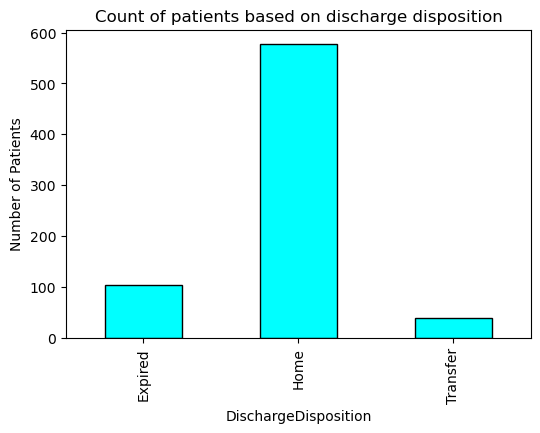

In [3]:
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

fig = plt.figure(figsize=(6,4))
df.groupby('DischargeDisposition')['PatientID'].size().plot(kind = "bar", color = "cyan", edgecolor="black")
plt.title("Count of patients based on discharge disposition")
plt.ylabel("Number of Patients")

### 28)Which reason of visit has maximum mortality rate.

In [24]:
df1 = pd.read_excel("HospitalDatabase.xlsx","EDUnique")
df2 = pd.read_excel("HospitalDatabase.xlsx","Discharges")
data = df2.merge(df1,on ='PatientID')

print(data.groupby("ReasonForVisit")["ExpectedMortality"].max().sort_values(ascending=False).head(1))

ReasonForVisit
Pneumonia    0.989945
Name: ExpectedMortality, dtype: float64


### 29)Calculate average LOS.

In [35]:
df = pd.read_excel("HospitalDatabase.xlsx","Discharges")

df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])

LOS = (df['DischargeDate'] - df['AdmissionDate']).dt.days
print("Average LOS = " , LOS.mean())

Average LOS =  9.534722222222221


### 30) Which patient id has most entries in readmission registry.

In [33]:
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

result = df['PatientID'].value_counts().idxmax()
print("Patient ID with most entries in ReAdmissionRegistry : " , result)

Patient ID with most entries in ReAdmissionRegistry :  23


### 61) Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

### 62) Display the data for all 'White Female' patients above the age of 50.

In [6]:
df = pd. read_excel("HospitalDatabase.xlsx","Patients")
from dateutil.relativedelta import relativedelta
df['Age'] = [relativedelta(pd.Timestamp.now(), d).years for d in df['DateOfBirth']]
df

df_g = df.query('Gender=="Female"  & Race=="White" & Age>50')
df_g

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,55
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,62
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,62
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56
39,40,Christian,Pow,1971-12-07 11:47:43.885,Female,White,Spanish,51
...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,52
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,59


### 63) Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [4]:
df = pd.read_excel("HospitalDatabase.xlsx","Patients")

result = df.loc[(df['PatientID'] > 100) & (df['PatientID'] <= 200)]
result.iloc[:, 1:3] 

,FirstName,LastName
100,Calla,Wasiela
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
...,...,...
195,Cathlene,Kidwell
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun


### 64)Using numpy functions, multiply the following arrays

In [24]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)

#a @ b 

output = np.matmul(a,b)
output

array([[10, 13],
       [28, 40]])

### 65) Get the  number of patients based on service and primary diagnosis.

In [30]:
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

df.groupby(['Service','PrimaryDiagnosis'])['PatientID'].count()

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

### 66) np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.

In [5]:
array = np.arange(1,31).reshape(6,5)
print(array)

slice = array[[0,0,4,4,5,5],[3,4,3,4,3,4]]

print("Required output:")
print(slice)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Required output:
[ 4  5 24 25 29 30]


### 67) Make a pivot table by the no. of patients from the admission date till discharge date.

In [3]:
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

pivot = pd.pivot_table (df, index = 'PatientID', values = ['AdmissionDate','DischargeDate'])
pivot

,AdmissionDate,DischargeDate
PatientID,,
1,2018-01-01,2018-01-04 19:59:31.391000064
2,2018-01-01,2018-01-04 21:28:51.897999872
3,2018-01-01,2018-01-04 22:28:23.672000000
5,2018-01-01,2018-01-05 05:47:04.932999936
6,2018-01-01,2018-01-05 14:18:30.028999936
...,...,...
738,2018-02-22,2018-03-07 21:22:10.060999936
739,2018-02-22,2018-03-08 02:43:18.748999936
740,2018-02-22,2018-03-08 09:27:18.376999936


### 68) Display the data where actual LOS is greater than expected LOS.

In [4]:
df = pd.read_excel("HospitalDatabase.xlsx","Discharges")

df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])

df['ActualLOS'] = (df['DischargeDate'] - df['AdmissionDate']).dt.days

filter_df = df[df['ActualLOS'] > df['ExpectedLOS']]

filter_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ActualLOS
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,15
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12
...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13


### 69) Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [29]:
df = pd.read_excel("HospitalDatabase.xlsx","Patients")

search_string =df[df[['FirstName','LastName']].apply(lambda x: x.str.contains('lau', case = False)).any(axis=1)]
search_string

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


### 70) Plot a graph to show the distribution of expected mortality.

Text(0.5, 0, 'Expected Mortality')

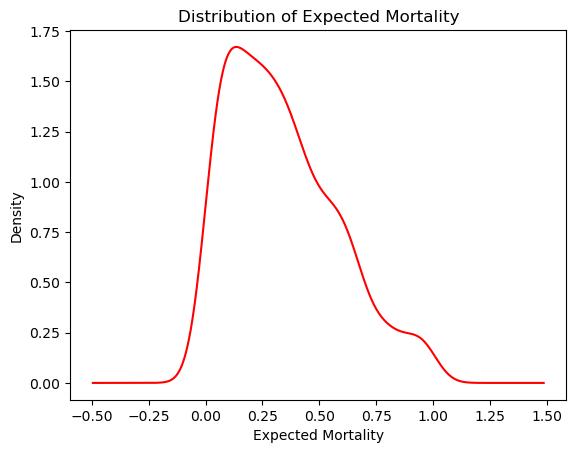

In [37]:
data = pd.read_excel("HospitalDatabase.xlsx","Discharges")

data['ExpectedMortality'].plot(kind = 'kde', color = "red")
plt.title('Distribution of Expected Mortality')
plt.xlabel('Expected Mortality')